In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)
!ls 'drive/MyDrive/uh'
list_of_name = ["opsahl-ucsocial", "radoslaw_email_email", "soc-sign-bitcoinotc", "dnc-corecipient", 'email-Eu-core-temporal.txt']

Mounted at /content/drive
dnc-corecipient.cvc		  out.prosper-loans
dnc-corecipient_pairs.csv	  out.radoslaw_email_email
email-Eu-core-temporal_pairs.csv  out.soc-sign-bitcoinalpha
email-Eu-core-temporal.txt.cvc	  out.soc-sign-bitcoinotc
opsahl-ucsocial.cvc		  out.sx-askubuntu
opsahl-ucsocial_pairs.csv	  out.sx-mathoverflow
out.digg-friends		  out.sx-superuser
out.dnc-corecipient		  radoslaw_email_email.cvc
out.email-Eu-core-temporal.txt	  radoslaw_email_email_pairs.csv
out.munmun_digg_reply		  soc-sign-bitcoinotc.cvc
out.opsahl-ucsocial		  soc-sign-bitcoinotc_pairs.csv


In [32]:
df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
df3 = pd.read_csv("drive/MyDrive/uh/out.soc-sign-bitcoinotc", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'weight', 'timestamp'])
df4 = pd.read_csv("drive/MyDrive/uh/out.dnc-corecipient", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'timestamp'])
df5 = pd.read_csv('drive/MyDrive/uh/out.email-Eu-core-temporal.txt', sep = ' |\t',  names = ['v1', 'v2', 'timestamp'])

df1_1 = pd.read_csv("drive/MyDrive/uh/opsahl-ucsocial_pairs.csv", sep = ',|\t', skiprows=1, names = ['v1', 'v2'])
df2_1 = pd.read_csv("drive/MyDrive/uh/radoslaw_email_email_pairs.csv", sep = ',|\t', skiprows=1, names = ['v1', 'v2'])
df3_1 = pd.read_csv("drive/MyDrive/uh/soc-sign-bitcoinotc_pairs.csv", sep = ',|\t', skiprows=1, names = ['v1', 'v2'])
df4_1 = pd.read_csv("drive/MyDrive/uh/dnc-corecipient_pairs.csv", sep = ',|\t', skiprows=1, names = ['v1', 'v2'])
df5_1 = pd.read_csv('drive/MyDrive/uh/email-Eu-core-temporal_pairs.csv', sep = ',|\t', skiprows=1, names = ['v1', 'v2'])

<ipython-input-32-981cde825cb0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
<ipython-input-32-981cde825cb0>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
<ipython-input-32-981cde825cb0>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s

In [43]:
df1

,v1,v2,weight,timestamp
0,1,2,1,1082008561
1,3,4,1,1082123439
2,5,2,1,1082381991
3,6,7,1,1082407219
4,8,7,1,1082407356
...,...,...,...,...
59830,1899,1847,1,1098744248
59831,1899,1097,1,1098744436
59832,1899,277,1,1098744603
59833,1878,1624,1,1098744711


**1. Число вершин, число рёбер, плотность (отношение числа рёбер к максимально
возможному числу рёбер), число компонент слабой связности, долю вершин в
максимальной по мощности компоненте слабой связности.**

1.1. Вершины

In [4]:
def task_1(df):
    vertexes = (set(df.v2.unique()) | set(df.v1.unique()))
    number_of_vertexes = len(vertexes)
    number_of_edges_directed =df.shape[0] 
    edges = sorted(set(zip((df[['v1','v2']]).min(axis = 1), (df[['v1','v2']]).max(axis = 1))))
    number_of_edges_undirected = len(edges)
    density = number_of_vertexes / ((number_of_vertexes*(number_of_vertexes - 1))/2)
    print("Число вершин: ", number_of_vertexes)
    print("Число направленных рёбер: ", number_of_edges_directed)
    print("Число ненаправленных рёбер: ", number_of_edges_undirected)
    print("Плотность: ", density)
    return vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density

1.4. Компоненты слабой связности


In [5]:
from collections import defaultdict
from collections import deque

In [6]:
def dfs_and_gcc(edges, neighbours, vertexes, max_component=False):
#на вход подается неориентированный список смежности
    access_vertexes = deque()
    visited = set()
    connected_components = defaultdict(set)
    connected_components_number = 0
    for vertex in vertexes:
        if vertex not in visited:
            connected_components_number += 1
            access_vertexes.append(vertex)
            while access_vertexes:
                u = access_vertexes.pop()
                for v in neighbours[u]:
                    if v not in visited:
                        access_vertexes.append(v)
                        visited.add(v)
                connected_components[connected_components_number].add(u)
                visited.add(u)
    print("Число компонент слабой связности: ", connected_components_number)
    if max_component:
        ind_max_component = max(connected_components, key=lambda num: len(connected_components[num]))
        return connected_components_number, ind_max_component, connected_components
    return connected_components_number, connected_components


**Второе задание. Предсказания появления ребер в графе**

In [28]:
# edges_with_сombining[edge] = deepcopy(params3)
# params3 = {'lin': deepcopy(params2), 'exp': deepcopy(params2), 'sqrt': deepcopy(params2)}
# params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
#            'second': deepcopy(сombining), 'third': deepcopy(сombining), 
#            'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
#            'mean': deepcopy(сombining)}
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def insert_into_df(df, edges_with_сombining):
  weights = list()
  
  for _, edge in df.iterrows():
    edge_w = list()
    tmp = edges_with_сombining[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]
    for type1 in ['lin', 'exp', 'sqrt']:
      for type2 in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        for type3 in ['sum', 'abs_diff', 'min', 'max']:
          edge_w.append(tmp[type1][type2][type3])

    weights.append(edge_w)

  edges_with_сombining = None
  
  df['features'] = weights
  print(df.head(5))
  return df


In [47]:
i = 0
for df in tqdm([df1, df2, df3, df4, df5]):
  print("Название датасета: ", list_of_name[i])
  df_1 = [df1_1, df2_1, df3_1, df4_1, df5_1]
  print(df.shape[0], df_1[i].shape[0])
  l = 0.2
  t_min = df.timestamp.min()
  t_max = df.timestamp.max()
  delta_t = t_max - t_min
  print(t_max, t_min, delta_t)

  df = df.sort_values(by=['timestamp'])
  vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df)
  print(df_1[i])
  edges_with_params, nodes_with_params, edges_with_сombining, result_df = get_params(df, df_1[i])
  
  get_temporal_weighting(df, edges_with_params, l, t_min, delta_t)
  fill_nodes(edges_with_params, nodes_with_params)
  quantiles_plus(edges_with_params, nodes_with_params)
  combining_node_activity(edges_with_сombining, nodes_with_params)
  result_df = insert_into_df(result_df, edges_with_сombining)
  print('------------------------------------------------------------------------------------------',result_df.shape[0])
  result_df.to_csv('drive/MyDrive/uh/' + list_of_name[i] + '.cvc') 

  i +=1
  print()

  0%|          | 0/5 [00:00<?, ?it/s]

Название датасета:  opsahl-ucsocial
59835 714390
1098744742 1082008561 16736181
Число вершин:  1899
Число направленных рёбер:  59835
Число ненаправленных рёбер:  13838
Плотность:  0.001053740779768177
          v1    v2  result
0          1     5       1
1          1  1127       1
2          1   400       1
3          1     4       1
4          1     9       1
...      ...   ...     ...
714385  1899  1852       1
714386  1899   140       1
714387  1899   755       1
714388  1899  1624       1
714389  1899   415       1

[714390 rows x 3 columns]
[   1    2    3 ... 1897 1898 1899]
10000 10000 20000 10000



100%|██████████| 13838/13838 [00:00<00:00, 146469.61it/s]

100%|██████████| 1899/1899 [00:00<00:00, 38183.05it/s]

100%|██████████| 13838/13838 [00:00<00:00, 152972.38it/s]

100%|██████████| 1899/1899 [00:00<00:00, 28529.31it/s]

100%|██████████| 1899/1899 [00:00<00:00, 7108.11it/s]


   v1  v2  weight     timestamp  result  \
0   1   2     1.0  1.082009e+09       0   
1   3   4     1.0  1.082123e+09       0   
2   9  14     1.0  1.082409e+09       0   
3   9  14     1.0  1.082410e+09       0   
4   9  24     1.0  1.082418e+09       0   

                                            features  
0  [0.4, 0.0, 0.2, 0.2, 0.7026058095332501, 0.113...  
1  [0.41098248160676565, 0.0, 0.20549124080338282...  
2  [0.43825173735872003, 6.457865148568054e-05, 0...  
3  [0.43825173735872003, 6.457865148568054e-05, 0...  
4  [0.43867673276239066, 0.0004895740551563166, 0...  
------------------------------------------------------------------------------------------ 20000


 20%|██        | 1/5 [00:16<01:04, 16.09s/it]


Название датасета:  radoslaw_email_email
82927 16104
1285884492 1262454010 23430482
Число вершин:  167
Число направленных рёбер:  82927
Число ненаправленных рёбер:  3251
Плотность:  0.012048192771084338
        v1   v2
0        1  165
1        1   92
2        1  160
3        1   97
4        1  161
...    ...  ...
16099  167  133
16100  167  136
16101  167  138
16102  167  149
16103  167  151

[16104 rows x 2 columns]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 14


100%|██████████| 3251/3251 [00:00<00:00, 152758.50it/s]

100%|██████████| 167/167 [00:00<00:00, 2701.30it/s]

100%|██████████| 3251/3251 [00:00<00:00, 78877.79it/s]

100%|██████████| 167/167 [00:00<00:00, 2081.75it/s]

100%|██████████| 167/167 [00:00<00:00, 706.98it/s]


   v1  v2  weight     timestamp  result  \
0   1   8     1.0  1.262454e+09       0   
1  29  22     1.0  1.262589e+09       0   
2  13   3     1.0  1.262590e+09       0   
3  19  50     1.0  1.262590e+09       0   
4  13   4     1.0  1.262591e+09       0   

                                            features  
0  [0.4, 0.0, 0.2, 0.2, 0.7765472686392026, 0.069...  
1  [0.4090298782585864, 5.162505833214426e-05, 0....  
2  [0.4, 0.0, 0.2, 0.2, 0.7498257014089595, 0.009...  
3  [0.4090418967906849, 0.0001976229084830472, 0....  
4  [0.4, 0.0, 0.2, 0.2, 0.8202586015942823, 0.061...  
------------------------------------------------------------------------------------------ 6502


 40%|████      | 2/5 [00:26<00:38, 12.91s/it]


Название датасета:  soc-sign-bitcoinotc
35592 2405778
1453684323.75728 1289241911.72836 164442412.02892017
Число вершин:  5881
Число направленных рёбер:  35592
Число ненаправленных рёбер:  21492
Плотность:  0.0003401360544217687
           v1    v2
0           1     7
1           1   135
2           1    12
3           1    13
4           1   391
...       ...   ...
2405773  5881  2019
2405774  5881  2030
2405775  5881  2034
2405776  5881  4088
2405777  5881  4092

[2405778 rows x 2 columns]
[   1    2    3 ... 5879 5880 5881]
10000 10000 20000 10000



100%|██████████| 21492/21492 [00:00<00:00, 117208.02it/s]

100%|██████████| 5881/5881 [00:00<00:00, 130317.90it/s]

100%|██████████| 21492/21492 [00:00<00:00, 119476.39it/s]

100%|██████████| 5881/5881 [00:00<00:00, 101509.48it/s]

100%|██████████| 5881/5881 [00:00<00:00, 11185.60it/s]


   v1  v2  weight     timestamp  result  \
0   1   3     2.0  1.289242e+09       0   
1   8   9     8.0  1.289254e+09       0   
2  10   1     7.0  1.289556e+09       0   
3  10  12     8.0  1.289556e+09       0   
4  10   2     7.0  1.289556e+09       0   

                                            features  
0  [0.40000014500113346, 1.4500113343363097e-07, ...  
1  [0.40012009280523403, 0.0, 0.20006004640261701...  
2  [0.4000602718806042, 6.02718806042013e-05, 0.2...  
3  [0.4006861205503379, 0.0005655767891294683, 0....  
4  [0.4000602718806042, 6.02718806042013e-05, 0.2...  
------------------------------------------------------------------------------------------ 20000


 60%|██████    | 3/5 [00:39<00:25, 13.00s/it]


Название датасета:  dnc-corecipient
12085 262962
792 1 791
Число вершин:  906
Число направленных рёбер:  12085
Число ненаправленных рёбер:  10429
Плотность:  0.0022099447513812156
          v1    v2
0          1    71
1          1  1712
2          1  1874
3          3    11
4          3    12
...      ...   ...
262957  2029  2012
262958  2029  2015
262959  2029  2017
262960  2029  2022
262961  2029  2027

[262962 rows x 2 columns]
[   1    3    4    7    9   11   12   14   15   16   21   22   23   24
   25   26   27   28   30   31   34   35   37   38   39   42   44   45
   46   47   49   51   52   54   55   56   57   60   61   64   66   71
   74   75   76   80   84   89   90   91   92   93   96   97   98  104
  105  108  109  111  117  119  120  121  122  123  125  132  136  140
  141  142  146  148  149  150  151  153  154  155  158  165  166  168
  171  174  177  178  182  184  186  187  188  189  191  195  196  197
  199  203  204  205  207  210  211  212  217  218  219  221  222  


100%|██████████| 10429/10429 [00:00<00:00, 165729.19it/s]

100%|██████████| 906/906 [00:00<00:00, 65040.21it/s]

100%|██████████| 10429/10429 [00:00<00:00, 183423.96it/s]

100%|██████████| 906/906 [00:00<00:00, 55638.29it/s]

100%|██████████| 906/906 [00:00<00:00, 10670.16it/s]


    v1    v2  timestamp  result  \
0    1  1699        1.0       0   
1  737  1278        1.0       0   
2  737  1936        1.0       0   
3  903   339        1.0       0   
4  903   852        1.0       0   

                                            features  
0  [0.4, 0.0, 0.2, 0.2, 0.4, 0.0, 0.2, 0.2, 0.4, ...  
1  [0.4, 0.0, 0.2, 0.2, 0.4, 0.0, 0.2, 0.2, 0.402...  
2  [0.4, 0.0, 0.2, 0.2, 0.4, 0.0, 0.2, 0.2, 0.4, ...  
3  [0.4, 0.0, 0.2, 0.2, 0.4, 0.0, 0.2, 0.2, 0.4, ...  
4  [0.4, 0.0, 0.2, 0.2, 0.4, 0.0, 0.2, 0.2, 0.402...  
------------------------------------------------------------------------------------------ 20000


 80%|████████  | 4/5 [00:50<00:12, 12.14s/it]


Название датасета:  email-Eu-core-temporal.txt
332334 415202
69459254 0 69459254
Число вершин:  986
Число направленных рёбер:  332334
Число ненаправленных рёбер:  16064
Плотность:  0.0020304568527918783
          v1   v2
0          0  141
1          0  530
2          0  795
3          0  547
4          0  421
...      ...  ...
415197  1004   33
415198  1004  801
415199  1004  733
415200  1004  180
415201  1004  215

[415202 rows x 2 columns]
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108 


100%|██████████| 16064/16064 [00:00<00:00, 105421.33it/s]

100%|██████████| 986/986 [00:00<00:00, 3361.67it/s]

100%|██████████| 16064/16064 [00:00<00:00, 106208.34it/s]

100%|██████████| 986/986 [00:00<00:00, 2624.14it/s]

100%|██████████| 986/986 [00:01<00:00, 711.94it/s]


    v1   v2  timestamp  result  \
0  569  862    24076.0       0   
1  947  774    25608.0       0   
2  569  862    33645.0       0   
3  569  862    33901.0       0   
4  692  769    33938.0       0   

                                            features  
0  [0.4005496402250448, 4.952543832398293e-06, 0....  
1  [0.40058746383887167, 0.0, 0.20029373191943584...  
2  [0.4005496402250448, 4.952543832398293e-06, 0....  
3  [0.4005496402250448, 4.952543832398293e-06, 0....  
4  [0.40070835197855714, 5.991426282811463e-05, 0...  
------------------------------------------------------------------------------------------ 20000


100%|██████████| 5/5 [01:31<00:00, 18.39s/it]

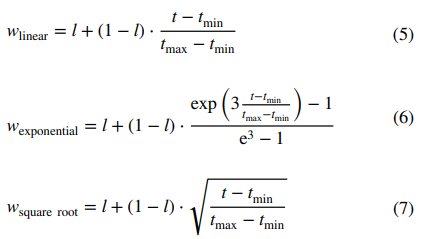

In [8]:
def get_sub_f(t, t_min, delta_t):
  return (t - t_min) / delta_t

def get_w_lin(l, sub_f):
  return l + (1 - l) * sub_f

def get_w_exp(l, sub_f):
  return l + (1 - l) * (math.exp(3 * sub_f) - 1) / (math.pow(math.e, 3) - 1)

def get_w_sqrt(l, sub_f):
  return l + (1 - l) * math.sqrt(sub_f)


In [9]:
from collections import defaultdict
from copy import deepcopy

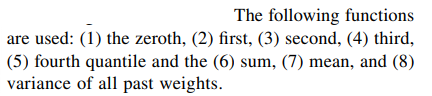

In [10]:
def get_zeroth(w):
  return w[0]

def get_first(w):
  indx = math.floor(len(w) / 4)
  return w[indx]

def get_second(w):
  indx = len(w) // 2
  if len(w) % 2:
    return w[indx]
  else:
    return (w[indx] + w[indx - 1]) / 2

def get_third(w):
  indx = math.floor(len(w) * 3 / 4)
  return w[indx]

def get_fourth(w):
  return w[-1]

def get_sum(w):
  return np.sum(np.array(w))

def get_mean(w):
  return np.mean(np.array(w))


In [46]:
# 4.1.3
def get_params(graph, graph_1):
  all_nodes = np.sort(adj_graph(graph).v1.unique())
  print(all_nodes)
  posibility_edges = itertools.combinations_with_replacement(all_nodes, 2)
  temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
  quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
  сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

  params = {'lin': {'w_lin': list(), 'quant_p': deepcopy(quantiles_plus)},
            'exp': {'w_exp': list(), 'quant_p': deepcopy(quantiles_plus)},
            'sqrt': {'w_sqrt': list(), 'quant_p': deepcopy(quantiles_plus)}} 

  params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
            'second': deepcopy(сombining), 'third': deepcopy(сombining), 
            'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
            'mean': deepcopy(сombining)}
            
  params3 = {'lin': deepcopy(params2), 'exp': deepcopy(params2), 'sqrt': deepcopy(params2)}


  len1 = min(len(edges), graph_1.shape[0])
  if len1 > 10000: 
    len1 = 10000
  len2 = len1
  # len1, len2 = len(edges), graph_1.shape[0]
  # len1, len2 = min(len1, len2), min(len1, len2)
  # if len1 > 10000: 
  #   len1 = 10000
  #   len2 = 10000

  choice_mask_1 = np.full((graph.shape[0]), False)
  choice_mask_1[:len1] = True
  np.random.shuffle(choice_mask_1)
  choice_mask_2 = np.full((graph_1.shape[0]), False)
  choice_mask_2[:len2] = True
  np.random.shuffle(choice_mask_2)

  graph['result'] = 0
  graph_1['result'] = 1
  result_df = pd.concat([graph.loc[choice_mask_1], graph_1.loc[choice_mask_2]], sort=False, ignore_index=True, axis=0)
  print(np.sum(choice_mask_1), np.sum(choice_mask_2), result_df.shape[0], graph.loc[choice_mask_1].shape[0])
  
  edges_with_params = defaultdict(None)
  nodes_with_params = defaultdict(None)
  edges_with_сombining = defaultdict(None)
  for edge in edges:
    edges_with_params[edge] = deepcopy(temporal_weighting)
  for node in all_nodes:
    nodes_with_params[node] = deepcopy(params)
  # vertexes, number_of_vertexes, number_of_edges_directed, edges_1, number_of_edges_undirected, density = task_1(graph_1)
  for _, edge in result_df.iterrows():
    edges_with_сombining[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))] = deepcopy(params3)

  return edges_with_params, nodes_with_params, edges_with_сombining, result_df

In [11]:
def time_normalization(timestemp, t_min, delta_t):
  return (timestemp - t_min) / delta_t

In [12]:
# 4.1.3
def get_temporal_weighting(graph, edges_with_params, l, t_min, delta_t):
  for _, edge in graph.iterrows():
    params = edges_with_params[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]

    norm_t = time_normalization(edge.timestamp, t_min, delta_t)
    # print(edge.timestamp, t_min, delta_t, norm_t)
    sub_f = get_sub_f(norm_t, 0, 1)

    params['w_lin'].append(get_w_lin(l, sub_f))
    params['w_exp'].append(get_w_exp(l, sub_f))
    params['w_sqrt'].append(get_w_sqrt(l, sub_f))


In [13]:
# 4.1.3
def fill_nodes(edges_with_params, nodes_with_params):
  for key in tqdm(edges_with_params):
    params = edges_with_params[key]
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[u][w_type]['w_' + w_type].extend(params['w_' + w_type])
      nodes_with_params[v][w_type]['w_' + w_type].extend(params['w_' + w_type])

    params = None #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  for key in tqdm(nodes_with_params):
    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[key][w_type]['w_' + w_type].sort()


In [14]:
# 4.1.3
# temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
# quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def quantiles_plus(edges_with_params, nodes_with_params):
  fill_nodes(edges_with_params, nodes_with_params)

  for key in tqdm(nodes_with_params):
    params = nodes_with_params[key]

    for w_type in ['lin', 'exp', 'sqrt']:
      tmp = params[w_type]
      tmp2 = params[w_type]['w_' + w_type]

      tmp['quant_p']['zeroth'] = get_zeroth(tmp2)
      tmp['quant_p']['first'] = get_first(tmp2)
      tmp['quant_p']['second'] = get_second(tmp2)
      tmp['quant_p']['third'] = get_third(tmp2)
      tmp['quant_p']['fourth'] = get_fourth(tmp2)
      tmp['quant_p']['sum'] = get_sum(tmp2)
      tmp['quant_p']['mean'] = get_mean(tmp2)

In [15]:
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def get_sum_c(a, b):
  return a + b
  
def get_abs_diff(a, b):
  return abs(a - b)
  
def get_min(a, b):
  return min(a, b)
  
def get_max(a, b):
  return max(a, b)

In [16]:
# 4.1.3
# params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
#            'second': deepcopy(сombining), 'third': deepcopy(сombining), 
#            'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
#            'mean': deepcopy(сombining)}

def combining_node_activity(edges_with_сombining, nodes_with_params):
  for key in edges_with_сombining:
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      edge = edges_with_сombining[key][w_type]
      u_node = nodes_with_params[u][w_type]['quant_p']
      v_node = nodes_with_params[v][w_type]['quant_p']
    
      for p_type in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        p_edge = edge[p_type]
        p_u_node = u_node[p_type]
        p_v_node = v_node[p_type]
        p_edge['sum'] = get_sum_c(p_u_node, p_v_node) 
        p_edge['abs_diff'] = get_abs_diff(p_u_node, p_v_node) 
        p_edge['min'] = get_min(p_u_node, p_v_node) 
        p_edge['max'] = get_max(p_u_node, p_v_node) 

In [18]:
! pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import itertools
import numpy as np
from tqdm import tqdm

ПЕРВОЕ ЗАДАНИЕ

In [19]:
def get_neighbors(adj, nodes):
  node_neighbors = defaultdict(set)
  for edge in tqdm(edges):
      node_neighbors[edge[0]].add(edge[1])
      node_neighbors[edge[1]].add(edge[0])

  return node_neighbors

In [20]:
def adj_cvc_graph(graph, cvc):
  cc = graph.loc[graph.v1.isin(cvc) & graph.v2.isin(cvc)]
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

In [21]:
def get_acc(graph, cvc):
#graph - dataframe (v1 v2 weight timelable)
#cvc - component of weak connectivity (list)
#acc - average cluster coefficient
  acc = 0
  n = len(cvc)

  adj = adj_cvc_graph(graph, cvc)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbors(adj, nodes)

  for u in tqdm(cvc):
    deg = len(node_neighbors[u])
    if deg <= 1: continue
    
    l_u = np.sum([len(set.intersection(node_neighbors[v], node_neighbors[u])) for v in node_neighbors[u]]) / 2
    
    acc += (2 * l_u) / (deg * (deg-1))

  return float(acc) / n

In [22]:
import math
import pandas as pd

In [23]:
def adj_graph(graph):
  cc = graph
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

In [24]:
def get_pcc(graph):
#graph - dataframe (v1 v2 weight timelable)
#pcc - Pearson correlation coefficient.
  adj = adj_graph(graph)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbors(adj, nodes)

  r_1 = adj.shape[0]
  r_2 = 0
  r_3 = 0
  r_e = 0
  for u in tqdm(nodes):
    k = len(node_neighbors[u])
    r_2 += math.pow(k, 2)
    r_3 += math.pow(k, 3)
    for v in node_neighbors[u]:
      r_e += len(node_neighbors[u]) * len(node_neighbors[v])
  
  r = float((r_e * r_1 - math.pow(r_2, 2))) / (r_3 * r_1 - math.pow(r_2, 2))

  return r

In [ ]:
graph = df1
cvc = connected_components[ind_max_component]

In [ ]:
len(cvc)

986

In [ ]:
acc = get_acc(graph, cvc)
pcc = get_pcc(graph)
print('\n')
print('acc: ', acc)
print('\n')
print('pcc: ', pcc)

100%|██████████| 279630/279630 [00:03<00:00, 91794.99it/s] 




acc:  0.09685343001219332


pcc:  -0.05570957449407056


In [ ]:
from multiprocessing import Pool